# Skin cancer classification challenge

**Summary :** Skin cancer classification

## Preliminaries and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 10, 10  #default setting
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

## I. Load Data

- **Rq : ** Datasets are quite light, can be fully loaded in a laptop memory with ease.

In [2]:
%%time
meta = pd.read_csv("../data/label_learn.csv",sep = ";")

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 5.61 ms


In [3]:
print(meta.shape)

(8581, 2)


- **Data integrity check**

In [4]:
#data integrity check
#variable types
def summaryze(df):
    summary =  pd.DataFrame()
    summary["column"] = list(df.columns)
    summary["type"] = list(df.dtypes)
    summary["nb_missing_values"] = list(df.isnull().sum())
    summary["nb_missing_values%"] = summary["nb_missing_values"]/len(df)*100
    summary["unique_values%"] = [len(set(df[x])) for x in list(df.columns)]
    summary.set_index("column",inplace=True)
    return summary

In [5]:
summaryze(meta)

,type,nb_missing_values,nb_missing_values%,unique_values%
column,,,,
name,object,0,0.0,8581
label,object,0,0.0,2


## II. Global Statistical Analysis

In [6]:
set(meta.label)

{'benign', 'malignant'}

In [11]:
len(meta[meta["label"]=="benign"])

7902

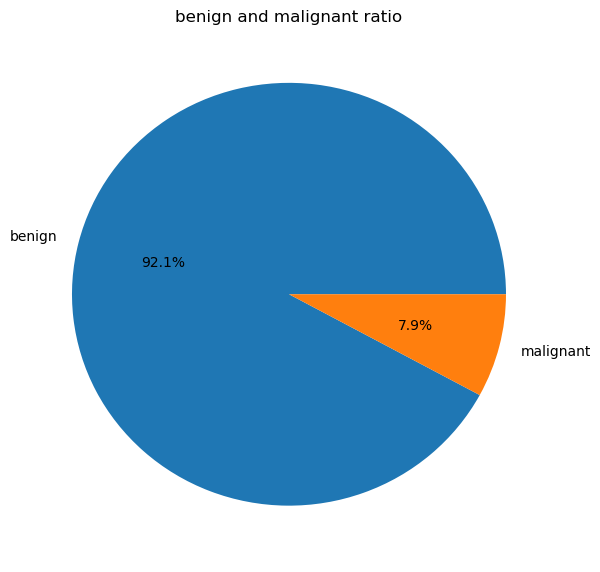

In [10]:
fig = plt.figure(figsize=(7,7),dpi=100)
temp = meta.groupby(meta.label).size()
temp = plt.pie(temp, labels=list(set(meta.label.dropna())),autopct='%1.1f%%')
plt.title("benign and malignant ratio")
plt.show()

> ### some sampling might be needed